In [2]:
dataset_name = "dataset-2024-06-12_12-33-29"

In [3]:
from src.tools import check_file_path,filename_to_timestamp
import os 
import numpy as np
from tqdm import tqdm
import multiprocessing
selected_names=[
    "grass",
    "sidewalk",
    "road",
    "floor",
    "earth",
    "path",
   
]

id_to_label_name = {
  "0": "wall",
  "1": "building",
  "2": "sky",
  "3": "floor",
  "4": "tree",
  "5": "ceiling",
  "6": "road",
  "7": "bed ",
  "8": "windowpane",
  "9": "grass",
  "10": "cabinet",
  "11": "sidewalk",
  "12": "person",
  "13": "earth",
  "14": "door",
  "15": "table",
  "16": "mountain",
  "17": "plant",
  "18": "curtain",
  "19": "chair",
  "20": "car",
  "21": "water",
  "22": "painting",
  "23": "sofa",
  "24": "shelf",
  "25": "house",
  "26": "sea",
  "27": "mirror",
  "28": "rug",
  "29": "field",
  "30": "armchair",
  "31": "seat",
  "32": "fence",
  "33": "desk",
  "34": "rock",
  "35": "wardrobe",
  "36": "lamp",
  "37": "bathtub",
  "38": "railing",
  "39": "cushion",
  "40": "base",
  "41": "box",
  "42": "column",
  "43": "signboard",
  "44": "chest of drawers",
  "45": "counter",
  "46": "sand",
  "47": "sink",
  "48": "skyscraper",
  "49": "fireplace",
  "50": "refrigerator",
  "51": "grandstand",
  "52": "path",
  "53": "stairs",
  "54": "runway",
  "55": "case",
  "56": "pool table",
  "57": "pillow",
  "58": "screen door",
  "59": "stairway",
  "60": "river",
  "61": "bridge",
  "62": "bookcase",
  "63": "blind",
  "64": "coffee table",
  "65": "toilet",
  "66": "flower",
  "67": "book",
  "68": "hill",
  "69": "bench",
  "70": "countertop",
  "71": "stove",
  "72": "palm",
  "73": "kitchen island",
  "74": "computer",
  "75": "swivel chair",
  "76": "boat",
  "77": "bar",
  "78": "arcade machine",
  "79": "hovel",
  "80": "bus",
  "81": "towel",
  "82": "light",
  "83": "truck",
  "84": "tower",
  "85": "chandelier",
  "86": "awning",
  "87": "streetlight",
  "88": "booth",
  "89": "television receiver",
  "90": "airplane",
  "91": "dirt track",
  "92": "apparel",
  "93": "pole",
  "94": "land",
  "95": "bannister",
  "96": "escalator",
  "97": "ottoman",
  "98": "bottle",
  "99": "buffet",
  "100": "poster",
  "101": "stage",
  "102": "van",
  "103": "ship",
  "104": "fountain",
  "105": "conveyer belt",
  "106": "canopy",
  "107": "washer",
  "108": "plaything",
  "109": "swimming pool",
  "110": "stool",
  "111": "barrel",
  "112": "basket",
  "113": "waterfall",
  "114": "tent",
  "115": "bag",
  "116": "minibike",
  "117": "cradle",
  "118": "oven",
  "119": "ball",
  "120": "food",
  "121": "step",
  "122": "tank",
  "123": "trade name",
  "124": "microwave",
  "125": "pot",
  "126": "animal",
  "127": "bicycle",
  "128": "lake",
  "129": "dishwasher",
  "130": "screen",
  "131": "blanket",
  "132": "sculpture",
  "133": "hood",
  "134": "sconce",
  "135": "vase",
  "136": "traffic light",
  "137": "tray",
  "138": "ashcan",
  "139": "fan",
  "140": "pier",
  "141": "crt screen",
  "142": "plate",
  "143": "monitor",
  "144": "bulletin board",
  "145": "shower",
  "146": "radiator",
  "147": "glass",
  "148": "clock",
  "149": "flag"
}

selected_ids = [int(key) for key, value in id_to_label_name.items() if value in selected_names]
cot_no_traversable = 2

dataset_folder = check_file_path(f"datasets",dataset_name,"train")

bins = np.linspace(0, cot_no_traversable, 80)

counts = np.zeros(len(bins)-1)
counts_class = np.zeros((len(selected_names),len(bins)-1))

def process_file(file):
    timestamp = filename_to_timestamp(file)
    rgb = check_file_path(dataset_folder,"rgb",timestamp+".jpg")
    confidence = np.load(check_file_path(dataset_folder,"confidence",timestamp+".npy"))
    mask_path = check_file_path(dataset_folder,"mask",file)
    segmentation = np.load(check_file_path(dataset_folder,"segmentation",timestamp+".npy"))
    mask = np.load(mask_path)

    mask[np.logical_and(confidence<0.5,mask==0)] = cot_no_traversable
    for i,bin in enumerate(bins[:-1]):
        select = np.logical_and(mask>bin,mask<=bins[i+1])
        counts[i] += np.sum(select) 
        for j in range(len(selected_names)):
            select_class = np.logical_and(segmentation==selected_ids[j],select)
            counts_class[j,i] += np.sum(select_class)
    return counts,counts_class
# multip
pool = multiprocessing.Pool(multiprocessing.cpu_count())
dataset_folder_mask = check_file_path(dataset_folder,'mask')
for counts_2,counts_class_2 in tqdm(pool.imap_unordered(process_file,os.listdir(dataset_folder_mask)),total=len(os.listdir(dataset_folder_mask))):
    counts+=counts_2
    counts_class+=counts_class_2
# for file in tqdm(os.listdir(check_file_path(dataset_folder,"mask"))):
#     timestamp = filename_to_timestamp(file)
#     rgb = check_file_path(dataset_folder,"rgb",timestamp+".jpg")
#     confidence = np.load(check_file_path(dataset_folder,"confidence",timestamp+".npy"))
#     mask_path = check_file_path(dataset_folder,"mask",file)
#     segmentation = np.load(check_file_path(dataset_folder,"segmentation",timestamp+".npy"))
#     mask = np.load(mask_path)

#     mask[np.logical_and(confidence<0.5,mask==0)] = cot_no_traversable
#     for i,bin in enumerate(bins[:-1]):
#         select = np.logical_and(mask>bin,mask<=bins[i+1])
#         counts[i] += np.sum(select) 
#         for j in range(len(selected_names)):
#             select_class = np.logical_and(segmentation==selected_ids[j],select)
#             counts_class[j,i] += np.sum(select_class)
    

100%|██████████| 594/594 [00:13<00:00, 43.00it/s]


Mean of class grass 1.1947979764718895
Mean of class sidewalk 0.9708947575257432
Mean of class road 1.0122549065960813
Mean of class floor 0.9944734493210978
Mean of class earth 0.9915535365588384
Mean of class path 1.1068267460054457


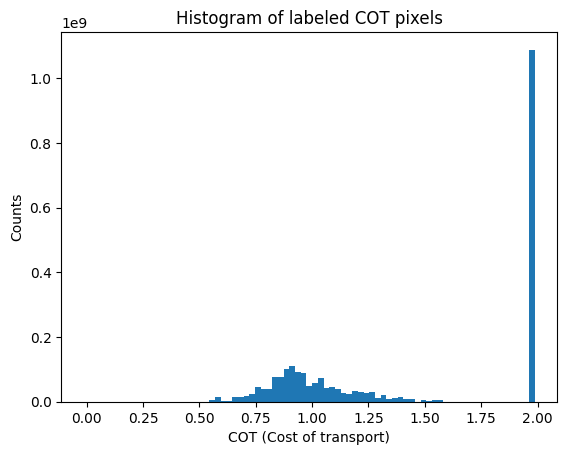

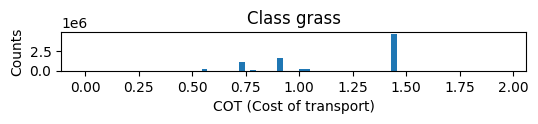

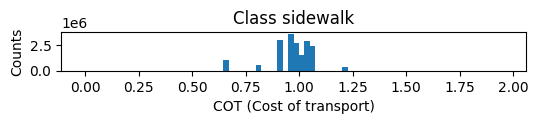

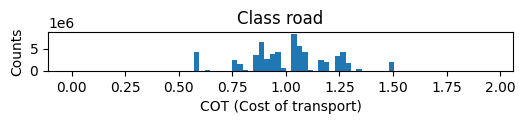

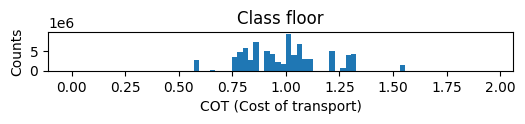

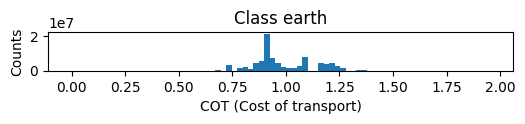

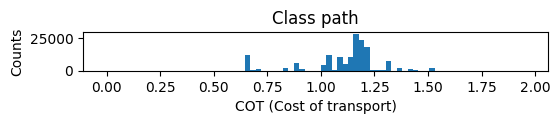

In [4]:
import matplotlib.pyplot as plt
# compute average cot of each class
for i in range(len(selected_names)):
    #compute mean
    mean = np.sum(counts_class[i][:-1]/np.sum(counts_class[i][:-1]) * bins[:-2])
    print("Mean of class",selected_names[i],mean)

plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
plt.xlabel('COT (Cost of transport)')
plt.ylabel('Counts')
plt.title('Histogram of labeled COT pixels')
plt.show()

for i in range(len(selected_names)):
    # change height of figure
    plt.figure(figsize=(6,0.5))
    plt.bar(bins[:-2], counts_class[i][:-1], width=(bins[1]-bins[0]))
    
    plt.xlabel('COT (Cost of transport)')
    plt.ylabel('Counts')
    plt.title(f'Class {selected_names[i]}')
    plt.show()

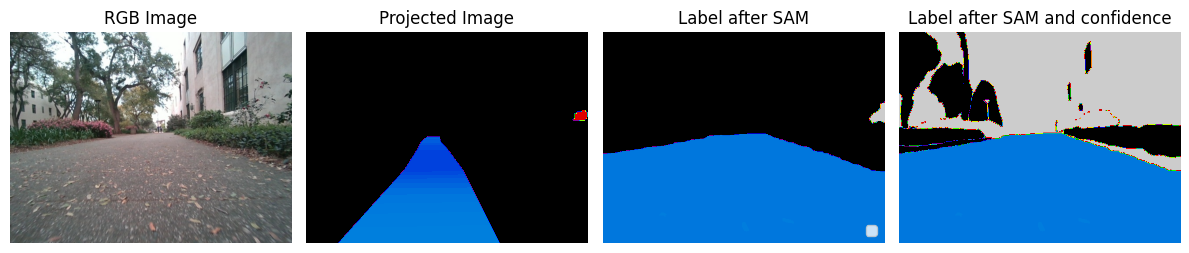

In [27]:
import PIL
from src.tools import check_file_path   
import numpy as np
import matplotlib.pyplot as plt
timestamp = "1712269449.276092"
exps = "datasets/dataset-2024-06-12_12-33-29/train"

rgb = check_file_path(exps,"rgb",timestamp+".jpg")
rgb = PIL.Image.open(rgb)
projected = np.load(check_file_path(exps,"mask_no_sam",timestamp+".npy"))
mask = np.load(check_file_path(exps,"mask",timestamp+".npy"))
confidence = np.load(check_file_path(exps,"confidence",timestamp+".npy"))  

c_sam = np.where(confidence>0.5,mask,2)
# mask_path = check_file_path(dataset_folder,"mask",timestamp+".npy")
# segmentation = np.load(check_file_path(dataset_folder,"segmentation",timestamp+".npy"))

#  Create a figure and axes
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Plot the images
axs[0].imshow(rgb)
axs[0].set_title('RGB Image')
axs[0].axis('off')

axs[1].imshow(projected, cmap='nipy_spectral', vmin=0.5, vmax=2)
axs[1].set_title('Projected Image')
axs[1].axis('off')

axs[2].imshow(mask, cmap='nipy_spectral', vmin=0.5, vmax=2)
axs[2].set_title('Label after SAM')
axs[2].axis('off')

axs[3].imshow(c_sam, cmap='nipy_spectral', vmin=0.5, vmax=2)
axs[3].set_title('Label after SAM and confidence')
axs[3].axis('off')


# Add a legend
legend_labels = ['Class 0', 'Class 1', 'Class 2']
axs[2].legend(legend_labels, loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12,12))
# plt.imshow(segmentation)
# plt.show()
